In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from halp.undirected_hypergraph import UndirectedHypergraph
from halp.utilities import undirected_graph_transformations, undirected_matrices
import scipy

Since bi-partite graphs and hypergraphs are equivalent (where one side of the bi-partite graph represents the nodes, and the other the hyperedges), we can generate large random bi-partite graphs using common libraries and then map them to hypergraphs.

## E-R Bipartite Model

In [44]:
# generate a bi-partite graph

G = nx.bipartite.random_graph(10,7, 0.4)

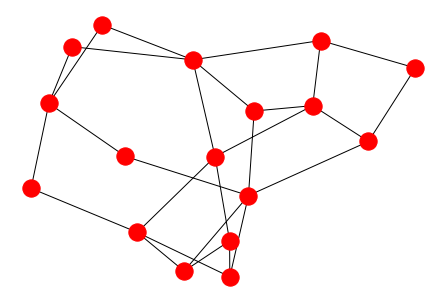

In [45]:
nx.draw(G)

In [46]:
I = nx.bipartite.biadjacency_matrix(G, row_order = range(10)).toarray()

In [47]:
I

array([[1, 0, 0, 0, 1, 1, 0],
       [0, 1, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 0],
       [0, 1, 1, 1, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0],
       [1, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 1]], dtype=int32)

In [48]:
A = I @ I.T
A = A - np.diag(np.diag(A))
A

array([[0, 0, 1, 1, 2, 0, 0, 2, 2, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 0, 1],
       [1, 1, 0, 2, 0, 0, 0, 1, 1, 1],
       [1, 1, 2, 0, 0, 0, 0, 1, 1, 1],
       [2, 1, 0, 0, 0, 1, 1, 2, 1, 0],
       [0, 1, 0, 0, 1, 0, 3, 1, 2, 1],
       [0, 1, 0, 0, 1, 3, 0, 1, 2, 1],
       [2, 1, 1, 1, 2, 1, 1, 0, 2, 0],
       [2, 0, 1, 1, 1, 2, 2, 2, 0, 1],
       [0, 1, 1, 1, 0, 1, 1, 0, 1, 0]], dtype=int32)

## Configuration Model

In [56]:
N = 10
E = 7
node_deg_sequence = np.random.randint(0, E, np.round(N, 0))

while np.sum(node_deg_sequence) % 2 == 1:
    node_deg_sequence = np.random.randint(0, E, np.round(N, 0))
    
    
# randomly allocate numbers connections to the hyperedges

edge_deg = np.random.rand(E)

# round and ensure sum is equal to the node degree sequence

edge_deg = np.round((np.sum(node_deg_sequence) / edge_deg.sum())*edge_deg, 0).astype(int)

if np.sum(edge_deg) != np.sum(node_deg_sequence):
    i  = np.random.choice(range(E))
    edge_deg[i] += np.sum(node_deg_sequence) - np.sum(edge_deg)

In [57]:
edge_deg

array([8, 2, 8, 4, 1, 5, 8])

In [58]:
G = nx.bipartite.configuration_model(node_deg_sequence, edge_deg)

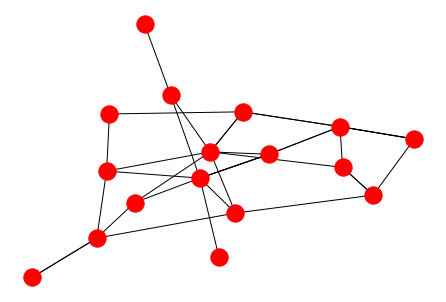

In [67]:
nx.draw(G)

In [1]:
# bi-partite adjacency matrix
I = nx.bipartite.biadjacency_matrix(G, row_order=range(N)).toarray()


# since configuration model can create multiple edges, we remove these 
# because it does not make sense for a node to have multiple edges to a hyperedge

I[I > 1] = 1
I

# hyper-adjacency matrix

A = I @ I.T
A = A - np.diag(np.diag(A))
A

NameError: name 'nx' is not defined

In [69]:
nx_graph = nx.from_numpy_matrix(A)

C:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


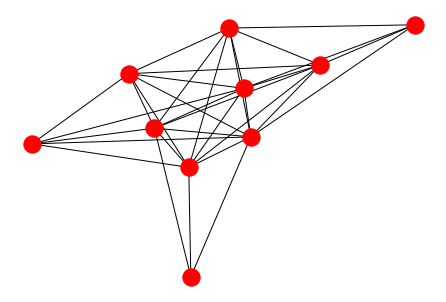

In [70]:
nx.draw(nx_graph)

In [13]:
def generate_config_hgraph(N, E, sparsityfactor):
    # generating a random configuration model-esque graph for a hypergraph
    
    # generate a random degree sequence, where a node has min deg of 1 (since we want graph to be connected)
    # and max degree of sparsityfactor*E 
    # if sparsityfactor = 1, then a node could belong to all hyperedges
    
    node_deg_sequence = np.random.randint(1, np.round(sparsityfactor*E, 0).astype(int), np.round(N, 0))

    while np.sum(node_deg_sequence) % 2 == 1:
        node_deg_sequence = np.random.randint(1, np.round(sparsityfactor*E, 0).astype(int), np.round(N, 0))


    # randomly allocate numbers connections to the hyperedges

    edge_deg = np.random.rand(E)

    # round and ensure sum is equal to the node degree sequence

    edge_deg = np.round((np.sum(node_deg_sequence) / edge_deg.sum())*edge_deg, 0).astype(int)

    if np.sum(edge_deg) != np.sum(node_deg_sequence):
        i  = np.random.choice(range(E))
        edge_deg[i] += np.sum(node_deg_sequence) - np.sum(edge_deg)
    
    # create a bipartite graph from the degree distributions using the configuration model
        
    G = nx.bipartite.configuration_model(node_deg_sequence, edge_deg)
    
    # generate hypergraph from bipartite incidence matrix
    I = nx.bipartite.biadjacency_matrix(G, row_order=range(N)).toarray()


    # since configuration model can create multiple edges, we remove these 
    # because it does not make sense for a node to have multiple edges to a hyperedge

    I[I > 1] = 1
    
    return I

In [16]:
I = generate_config_hgraph(100, 20, 0.5)

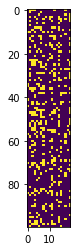

In [17]:
plt.imshow(I)